In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import scipy.io as sio

In [2]:
import importlib

import utils as my_util

importlib.reload(my_util)

<module 'utils' from 'E:\\MyPapers\\PYTHON\\notebooks\\utils.py'>

In [11]:
spectrel_data = "E:\\MyPapers\\高光谱数据\\科研实验数据集 - 副本\\Pavia University scene\\PaviaU.mat"
spectrel_label = "E:\\MyPapers\\高光谱数据\\科研实验数据集 - 副本\\Pavia University scene\\PaviaU_gt.mat"

- # Load data

(610, 340)
(207400,)


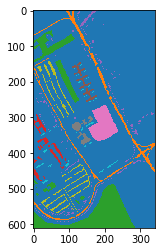

In [24]:
pavia = sio.loadmat(spectrel_data)
pavia_lab = sio.loadmat(spectrel_label)

test_pav = pavia['paviaU']
test_gt = pavia_lab['paviaU_gt']

print(test_gt.shape)

test_gt = test_gt.flatten()
np.save("five_block_dataset_Y.npy", test_gt)
print(test_gt.shape)



test_gt = test_gt.reshape((test_pav.shape[0], test_pav.shape[1], 1))

exp_dataset = np.concatenate((test_pav, test_gt), axis=2)

del(test_pav)
del(test_gt)


In [8]:
exp_dataset.shape

(610, 340, 104)

- # Data transformation 

In [17]:
feed_pav = exp_dataset[:,:,:-1]
print(feed_pav.shape)

dataset = my_util.transform(image=feed_pav)

del(feed_pav);del(exp_dataset)

(610, 340, 103)
dataset shape: (207400, 5, 5, 103)
loop number: 207400


In [18]:
print(dataset.dtype)
print(dataset.shape)
print(dataset.size)

float32
(207400, 5, 5, 103)
534055000


- # Save data

In [19]:
np.save("five_block_dataset_X.npy", dataset)

In [2]:
dataset = np.load("five_block_dataset_X.npy")

In [13]:
dataset_Y = np.load("five_block_dataset_Y.npy")

In [14]:
print(dataset.shape)
print(dataset_Y.shape)

(207400, 5, 5, 103)
(207400,)


- # Roughly check out the dataset

In [121]:
#Vega10 detailed color code
cmaps = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd',
         '#8c564b', '#e377c2','#7f7f7f','#bcbd22','#17becf']

r, c = 320, 120

ddd = dataset[r*340+c]
'''
c=cmaps[pavia_lab['paviaU_gt'][r,c]], 
c=cmaps[int(ddd[2, 2, 103])],
'''

"\nc=cmaps[pavia_lab['paviaU_gt'][r,c]], \nc=cmaps[int(ddd[2, 2, 103])],\n"

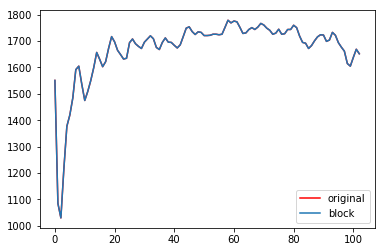

In [123]:
plt.figure()
plt.plot(pavia['paviaU'][r,c], label='original', c='red')
plt.plot(ddd[2,2,:103], label='block')
plt.legend()
plt.show()

In [22]:
del(dataset)

In [4]:
import keras

In [2]:
from keras.models import load_model

In [3]:
my_model = load_model("../scripts/hyper_34_trained_model_callback.h5")

In [ ]:
data_34 = np.load(./TF_Practice/train_test_data/X_34_test.npy)